In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from mypipes import *

warnings.filterwarnings('ignore')
from datetime import datetime
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [2]:
med = pd.read_csv('/content/medical_history.csv')
demographic = pd.read_csv('/content/demographic_details (1).csv')
data = pd.read_csv('/content/train.csv')

In [3]:
med.head()

,PatientId,Hipertension,Diabetes,Alcoholism,Handcap
0,2.987250e+13,1,0,0,0
1,5.589978e+14,0,0,0,0
2,4.262962e+12,0,0,0,0
3,8.679512e+11,0,0,0,0
4,8.841186e+12,1,1,0,0


In [4]:
demographic.head()

,PatientId,Gender,Age,Neighbourhood,Scholarship
0,2.987250e+13,F,62,JARDIM DA PENHA,0
1,5.589978e+14,M,56,JARDIM DA PENHA,0
2,4.262962e+12,F,62,MATA DA PRAIA,0
3,8.679512e+11,F,8,PONTAL DE CAMBURI,0
4,8.841186e+12,F,56,JARDIM DA PENHA,0


In [5]:
data.head()

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,SMS_received,No-show
0,2.987250e+13,5642903,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,0,No
1,5.589978e+14,5642503,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,0,No
2,8.679512e+11,5642828,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,0,No
3,8.841186e+12,5642494,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,0,No
4,9.598513e+13,5626772,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,0,No


In [6]:
data.shape, med.shape, demographic.shape

((99490, 6), (62299, 5), (62299, 5))

In [7]:
merged_med_demo = pd.merge(med, demographic, how='outer', on='PatientId')
print('Shape: ',merged_med_demo.shape)
merged_med_demo.head()

Shape:  (62299, 9)


,PatientId,Hipertension,Diabetes,Alcoholism,Handcap,Gender,Age,Neighbourhood,Scholarship
0,2.987250e+13,1,0,0,0,F,62,JARDIM DA PENHA,0
1,5.589978e+14,0,0,0,0,M,56,JARDIM DA PENHA,0
2,4.262962e+12,0,0,0,0,F,62,MATA DA PRAIA,0
3,8.679512e+11,0,0,0,0,F,8,PONTAL DE CAMBURI,0
4,8.841186e+12,1,1,0,0,F,56,JARDIM DA PENHA,0


In [8]:
data = pd.merge(data, merged_med_demo, how='left', on='PatientId')
data.head()

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,SMS_received,No-show,Hipertension,Diabetes,Alcoholism,Handcap,Gender,Age,Neighbourhood,Scholarship
0,2.987250e+13,5642903,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,0,No,1,0,0,0,F,62,JARDIM DA PENHA,0
1,5.589978e+14,5642503,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,0,No,0,0,0,0,M,56,JARDIM DA PENHA,0
2,8.679512e+11,5642828,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,0,No,0,0,0,0,F,8,PONTAL DE CAMBURI,0
3,8.841186e+12,5642494,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,0,No,1,1,0,0,F,56,JARDIM DA PENHA,0
4,9.598513e+13,5626772,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,0,No,1,0,0,0,F,76,REPÚBLICA,0


In [9]:
test = pd.read_csv('/content/test_share.csv')
test = pd.merge(test, merged_med_demo,how='left', on='PatientId')
print('Test Shape :', test.shape)
test.head()

Test Shape : (10854, 13)


,PatientId,AppointmentID,ScheduledDay,AppointmentDay,SMS_received,Hipertension,Diabetes,Alcoholism,Handcap,Gender,Age,Neighbourhood,Scholarship
0,7.223289e+12,5640433,2016-04-29T10:43:14Z,2016-04-29T00:00:00Z,0,0,0,0,0,F,46,DA PENHA,0
1,8.632298e+14,5616091,2016-04-25T13:29:16Z,2016-04-29T00:00:00Z,1,0,0,0,0,M,13,CONQUISTA,0
2,4.438587e+14,5637909,2016-04-29T07:30:31Z,2016-04-29T00:00:00Z,0,0,0,0,0,M,6,CONQUISTA,0
3,4.179932e+13,5638018,2016-04-29T07:37:45Z,2016-04-29T00:00:00Z,0,0,0,0,0,M,2,NOVA PALESTINA,0
4,3.647762e+13,5614045,2016-04-25T10:01:13Z,2016-04-29T00:00:00Z,1,0,0,0,0,F,3,CONQUISTA,1


In [10]:
X = data.drop(['No-show'], axis = 1)
y = data['No-show']

In [11]:
X.shape, test.shape

((99490, 13), (10854, 13))

In [12]:
print(X.columns)
print('-'*80)
print(test.columns)

Index(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay',
       'SMS_received', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap',
       'Gender', 'Age', 'Neighbourhood', 'Scholarship'],
      dtype='object')
--------------------------------------------------------------------------------
Index(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay',
       'SMS_received', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap',
       'Gender', 'Age', 'Neighbourhood', 'Scholarship'],
      dtype='object')


In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99490 entries, 0 to 99489
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PatientId       99490 non-null  float64
 1   AppointmentID   99490 non-null  int64  
 2   ScheduledDay    99490 non-null  object 
 3   AppointmentDay  99490 non-null  object 
 4   SMS_received    99490 non-null  int64  
 5   Hipertension    99490 non-null  int64  
 6   Diabetes        99490 non-null  int64  
 7   Alcoholism      99490 non-null  int64  
 8   Handcap         99490 non-null  int64  
 9   Gender          99490 non-null  object 
 10  Age             99490 non-null  int64  
 11  Neighbourhood   99490 non-null  object 
 12  Scholarship     99490 non-null  int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 9.9+ MB


In [14]:
X.isnull().sum()

,0
PatientId,0
AppointmentID,0
ScheduledDay,0
AppointmentDay,0
SMS_received,0
Hipertension,0
Diabetes,0
Alcoholism,0
Handcap,0
Gender,0


In [15]:
X.loc[:, ['ScheduledDay','AppointmentDay']]

,ScheduledDay,AppointmentDay
0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z
1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z
2,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z
3,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z
4,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z
...,...,...
99485,2016-05-03T07:51:47Z,2016-06-07T00:00:00Z
99486,2016-05-03T08:23:40Z,2016-06-07T00:00:00Z
99487,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z
99488,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z


In [16]:
def extract(data):
    label = ['ScheduledDay', 'AppointmentDay']
    for i in label:
        data[i] = pd.to_datetime(data[i])
        date = i+'_'+'date'
        time = i+'_'+'time'
        data[date] = data[i].dt.date
        data[time] = data[i].dt.time
    return data

In [17]:
X = extract(X)
test = extract(test)

In [18]:
X.head()

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,SMS_received,Hipertension,Diabetes,Alcoholism,Handcap,Gender,Age,Neighbourhood,Scholarship,ScheduledDay_date,ScheduledDay_time,AppointmentDay_date,AppointmentDay_time
0,2.987250e+13,5642903,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,0,1,0,0,0,F,62,JARDIM DA PENHA,0,2016-04-29,18:38:08,2016-04-29,00:00:00
1,5.589978e+14,5642503,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,0,0,0,0,0,M,56,JARDIM DA PENHA,0,2016-04-29,16:08:27,2016-04-29,00:00:00
2,8.679512e+11,5642828,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,0,0,0,0,0,F,8,PONTAL DE CAMBURI,0,2016-04-29,17:29:31,2016-04-29,00:00:00
3,8.841186e+12,5642494,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,0,1,1,0,0,F,56,JARDIM DA PENHA,0,2016-04-29,16:07:23,2016-04-29,00:00:00
4,9.598513e+13,5626772,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,0,1,0,0,0,F,76,REPÚBLICA,0,2016-04-27,08:36:51,2016-04-29,00:00:00


In [19]:
def hour_diff(row):
    time_format = '%H:%M:%S'
    time1 = datetime.strptime(str(row['ScheduledDay_time']), time_format)
    time2 = datetime.strptime(str(row['AppointmentDay_time']), time_format)
    time_difference = time1 - time2  # Note: Adjust this if time2 should be later than time1
    hours_difference = time_difference.total_seconds() / 3600
    return hours_difference

X['hours_difference'] = X.apply(lambda row: hour_diff(row), axis=1)
test['hours_difference'] = test.apply(lambda row: hour_diff(row), axis=1)

In [20]:
def day_diff(row):
    date_format = '%Y-%m-%d'
    date1 = datetime.strptime(str(row['ScheduledDay_date']), date_format)
    date2 = datetime.strptime(str(row['AppointmentDay_date']), date_format)
    time_difference = date2 - date1  # Note: Adjust this if date2 should be later than date1
    days_difference = time_difference.days
    return days_difference
X['days_difference'] = X.apply(lambda row: day_diff(row), axis=1)
test['days_difference'] = test.apply(lambda row: day_diff(row), axis=1)

In [21]:
columns = ['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay','ScheduledDay_date', 'ScheduledDay_time','AppointmentDay_date', 'AppointmentDay_time']
for i in columns:
    X = X.drop([i], axis = 1)
    test = test.drop([i], axis = 1)

In [22]:
X.head()

,SMS_received,Hipertension,Diabetes,Alcoholism,Handcap,Gender,Age,Neighbourhood,Scholarship,hours_difference,days_difference
0,0,1,0,0,0,F,62,JARDIM DA PENHA,0,18.635556,0
1,0,0,0,0,0,M,56,JARDIM DA PENHA,0,16.140833,0
2,0,0,0,0,0,F,8,PONTAL DE CAMBURI,0,17.491944,0
3,0,1,1,0,0,F,56,JARDIM DA PENHA,0,16.123056,0
4,0,1,0,0,0,F,76,REPÚBLICA,0,8.614167,2


<Figure size 800x500 with 0 Axes>

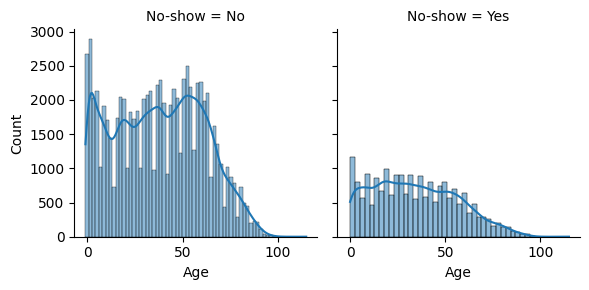

In [23]:
plt.figure(figsize = (8, 5))
g = sns.FacetGrid(data,col='No-show')
g.map(sns.histplot, 'Age', kde = True)
plt.show()

<Axes: xlabel='Gender', ylabel='count'>

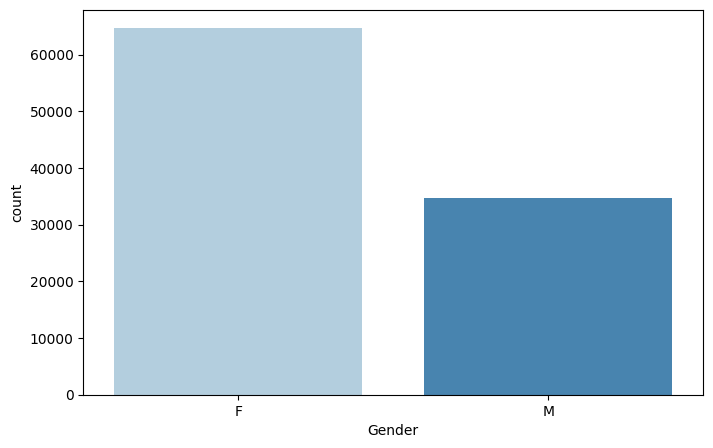

In [24]:
plt.figure(figsize = (8,5))
sns.countplot(x = X['Gender'], palette = 'Blues')

<Axes: ylabel='Density'>

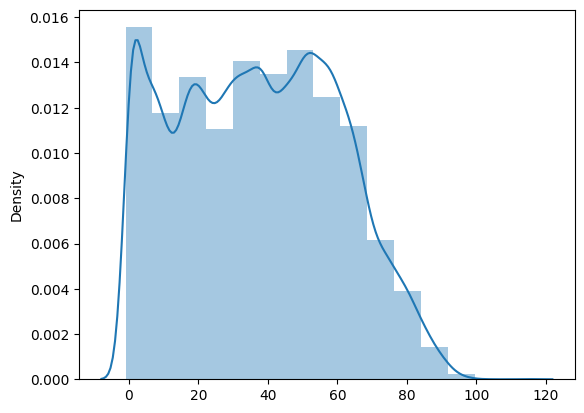

In [25]:
sns.distplot(x = X.Age, bins = 15, kde = True)

<Figure size 800x500 with 0 Axes>

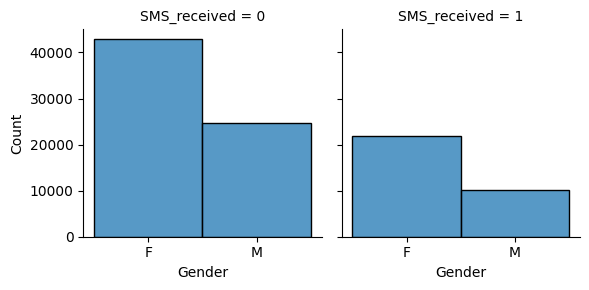

In [26]:
plt.figure(figsize = (8, 5))
g = sns.FacetGrid(X, col = 'SMS_received')
g.map(sns.histplot, 'Gender', discrete=True)
plt.tight_layout()
plt.show()

<Figure size 800x500 with 0 Axes>

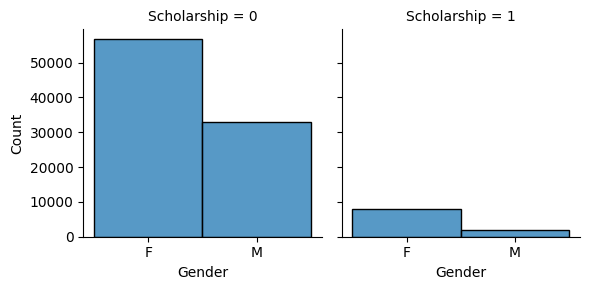

In [27]:
plt.figure(figsize = (8, 5))
g = sns.FacetGrid(X, col = 'Scholarship')
g.map(sns.histplot, 'Gender', discrete=True)
plt.tight_layout()
plt.show()

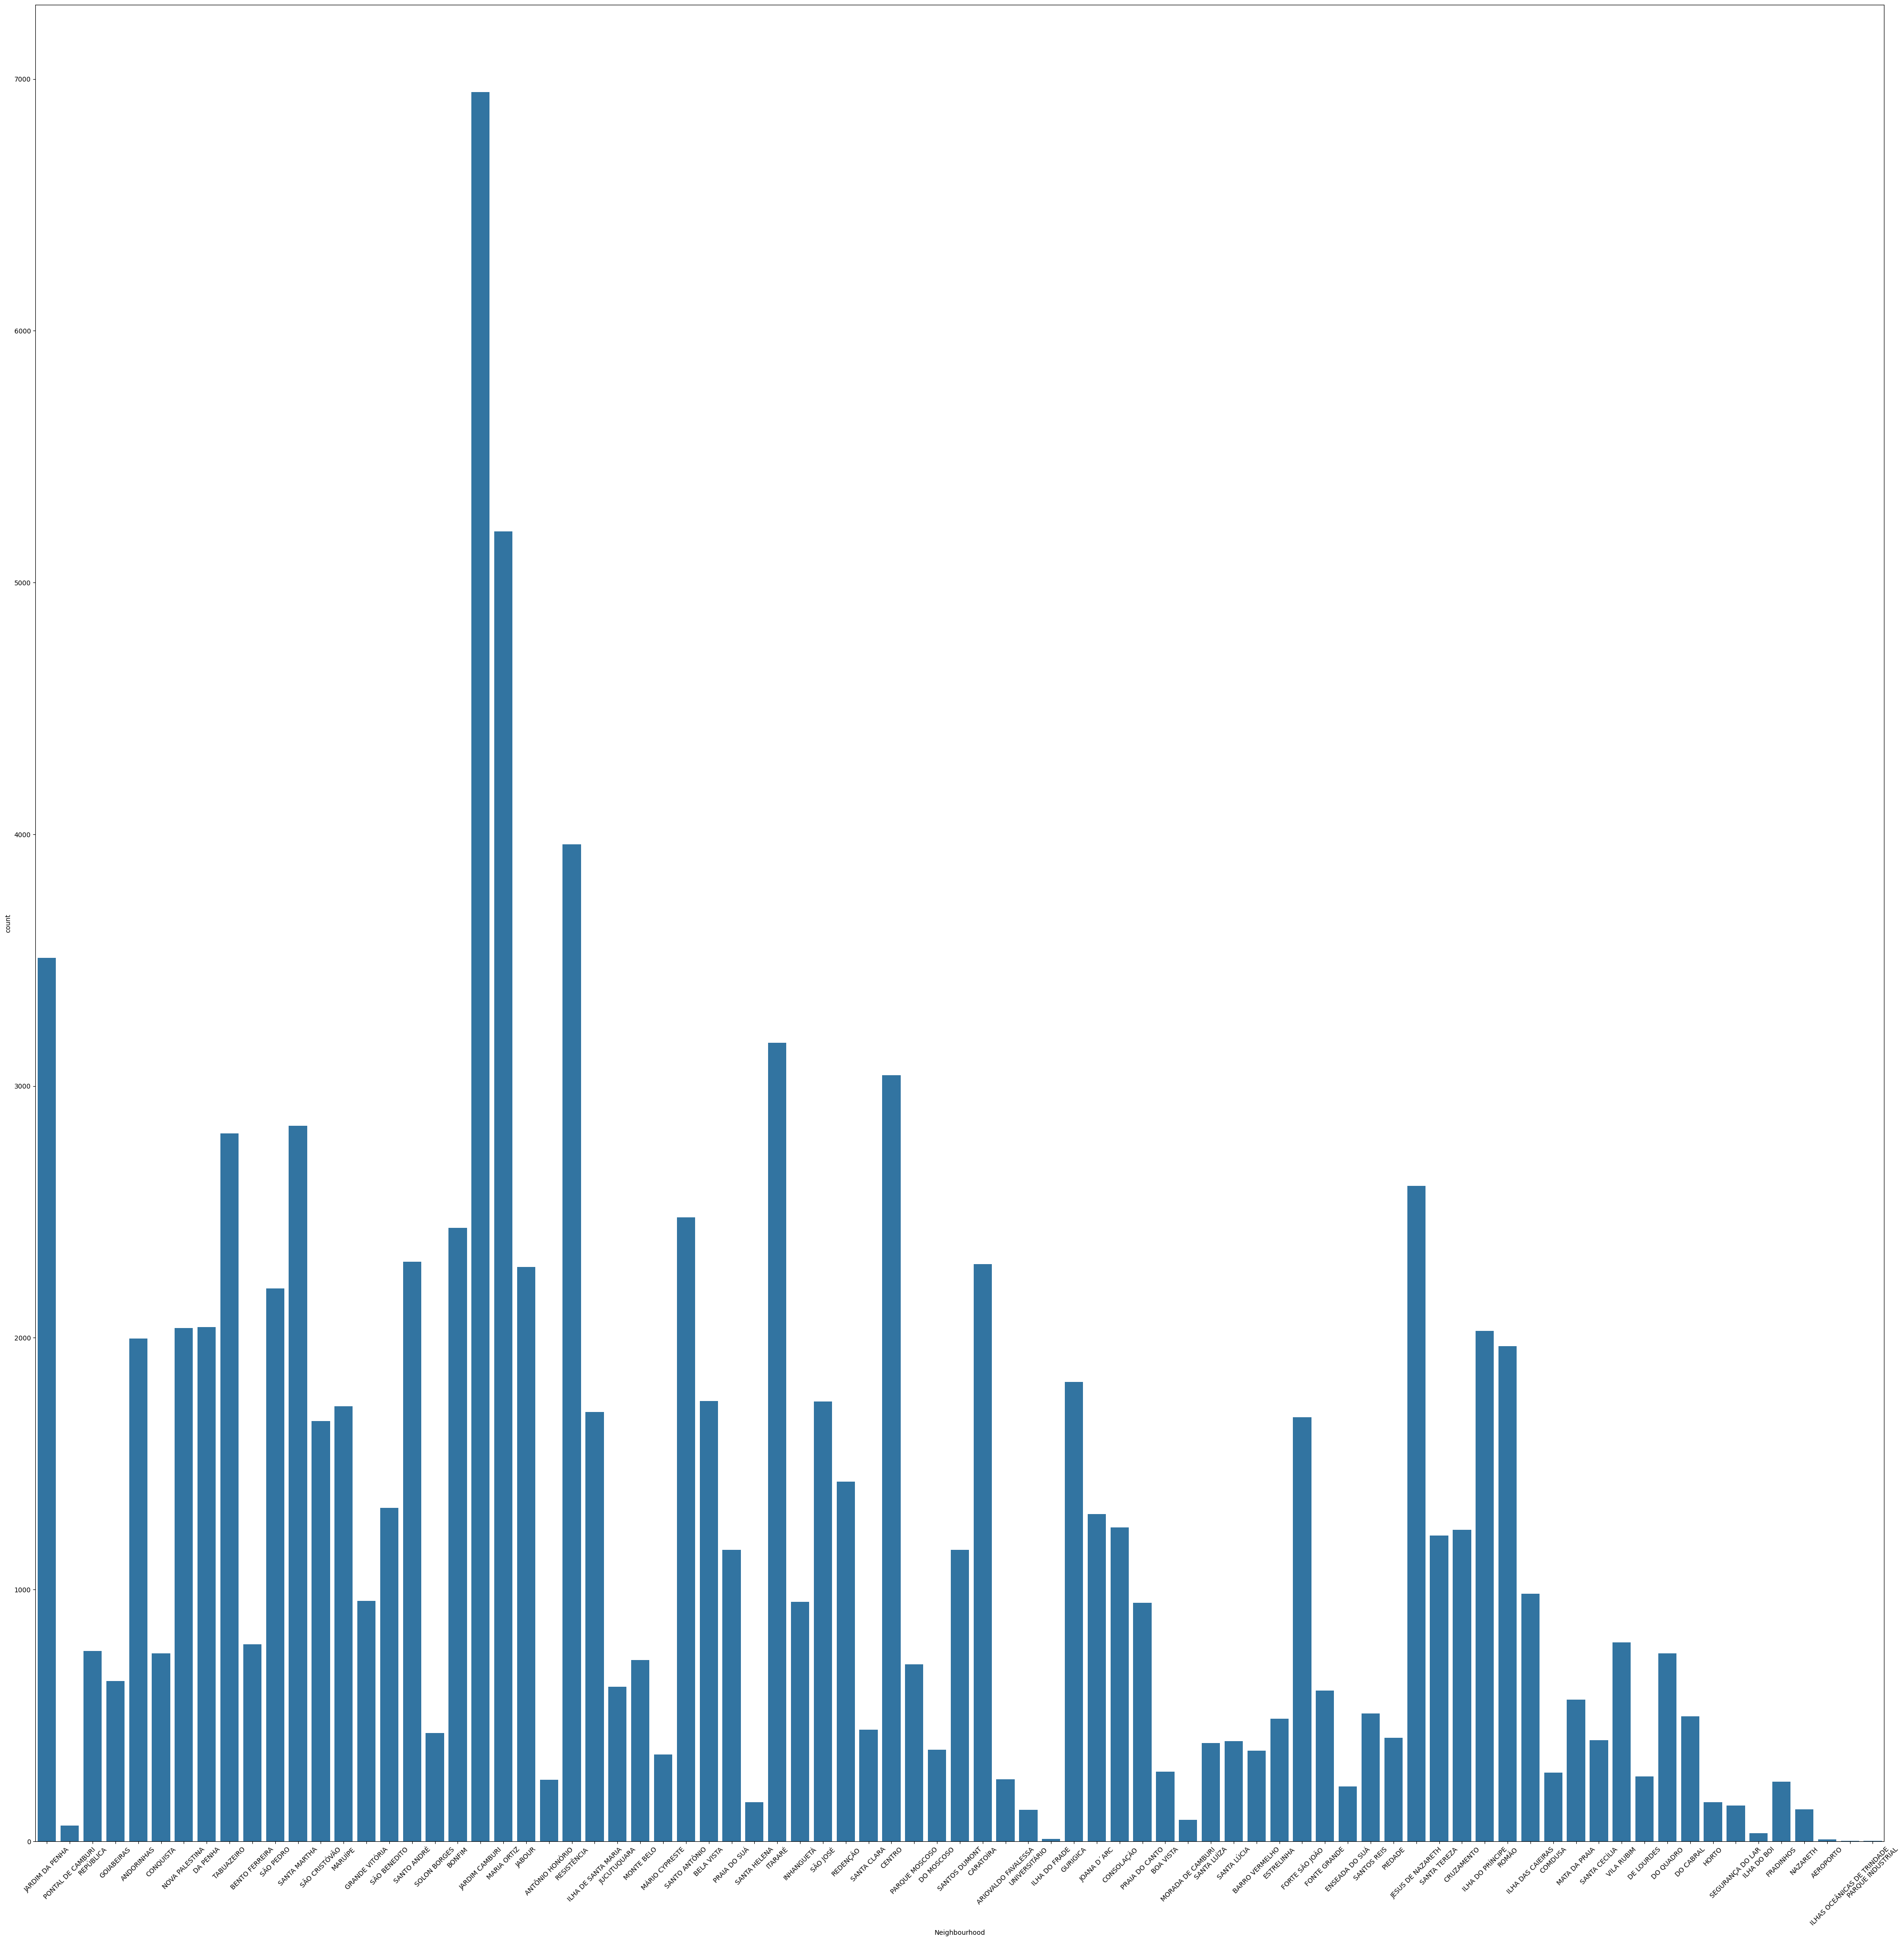

In [28]:
plt.figure(figsize = (50, 50))
sns.countplot(x = X.Neighbourhood)
plt.xticks(rotation = 45)
plt.show()

In [29]:
p1 = Pipeline([
    ('varselector',VarSelector(['Gender','Neighbourhood'])),
    ('dataimputer',DataFrameImputer()),
    ('getDummies',get_dummies_Pipe(100))
])

In [30]:
X.shape, y.shape

((99490, 11), (99490,))

In [31]:
y = (y == 'Yes').astype(int)

In [32]:
y.value_counts()

,count
No-show,
0,79360
1,20130


In [33]:
p1.fit(X)

Pipeline(steps=[('varselector',
                 VarSelector(feature_names=['Gender', 'Neighbourhood'])),
                ('dataimputer', DataFrameImputer()),
                ('getDummies', get_dummies_Pipe(freq_cutoff=100))])

In [34]:
x_train = pd.DataFrame(data = p1.transform(X),
                 columns = p1.get_feature_names_out())
x_test = pd.DataFrame(data = p1.transform(test),
                 columns = p1.get_feature_names_out())

In [35]:
X = X.drop(['Gender', 'Neighbourhood'], axis = 1)
test = test.drop(['Gender', 'Neighbourhood'], axis = 1)

In [36]:
X.head()

,SMS_received,Hipertension,Diabetes,Alcoholism,Handcap,Age,Scholarship,hours_difference,days_difference
0,0,1,0,0,0,62,0,18.635556,0
1,0,0,0,0,0,56,0,16.140833,0
2,0,0,0,0,0,8,0,17.491944,0
3,0,1,1,0,0,56,0,16.123056,0
4,0,1,0,0,0,76,0,8.614167,2


In [37]:
X = pd.concat([X, x_train], axis = 'columns')
test = pd.concat([test, x_test], axis = 'columns')

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7)

In [39]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

In [45]:
models = {
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_jobs=-1),
    'AdaBoost': AdaBoostClassifier(),
    'Bagging Classifier': BaggingClassifier(n_jobs=-1),  # Parallel processing
    'Extra Trees': ExtraTreesClassifier(n_jobs=-1),  # Parallel processing
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(n_jobs=-1),  # Parallel processing
    'LightGBM': lgb.LGBMClassifier()
}

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [46]:
model_results = {}
for name, model in models.items():
    print(name)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else y_pred
    model_results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_pred_proba)
    }
results_df = pd.DataFrame(model_results).T
print(results_df)

K-Nearest Neighbors
Decision Tree
Logistic Regression
Random Forest
AdaBoost
Bagging Classifier
Extra Trees
Gradient Boosting
XGBoost
LightGBM
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 14204, number of negative: 55439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009719 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 634
[LightGBM] [Info] Number of data points in the train set: 69643, number of used features: 84
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203954 -> initscore=-1.361760
[LightGBM] [Info] Start training from score -1.361760
                     Accuracy  Precision    Recall  F1 Score   ROC AUC
K-Nearest Neighbors  0.777164   0.379608  0.192879  0.255791  0.666406
Decision Tree        0.732536   0.326648  0.327033  0.326840  0.579985
Logisti

In [47]:
results_df

,Accuracy,Precision,Recall,F1 Score,ROC AUC
K-Nearest Neighbors,0.777164,0.379608,0.192879,0.255791,0.666406
Decision Tree,0.732536,0.326648,0.327033,0.326840,0.579985
Logistic Regression,0.798003,0.345345,0.019406,0.036747,0.667373
Random Forest,0.796797,0.467629,0.169423,0.248730,0.727434
AdaBoost,0.800784,0.462121,0.020587,0.039418,0.727858
Bagging Classifier,0.789125,0.425264,0.176679,0.249642,0.694638
Extra Trees,0.783563,0.410282,0.206041,0.274320,0.702551
Gradient Boosting,0.801488,0.505618,0.007594,0.014963,0.732677
XGBoost,0.801521,0.501168,0.072393,0.126511,0.739448
LightGBM,0.802794,0.563291,0.030037,0.057033,0.738784


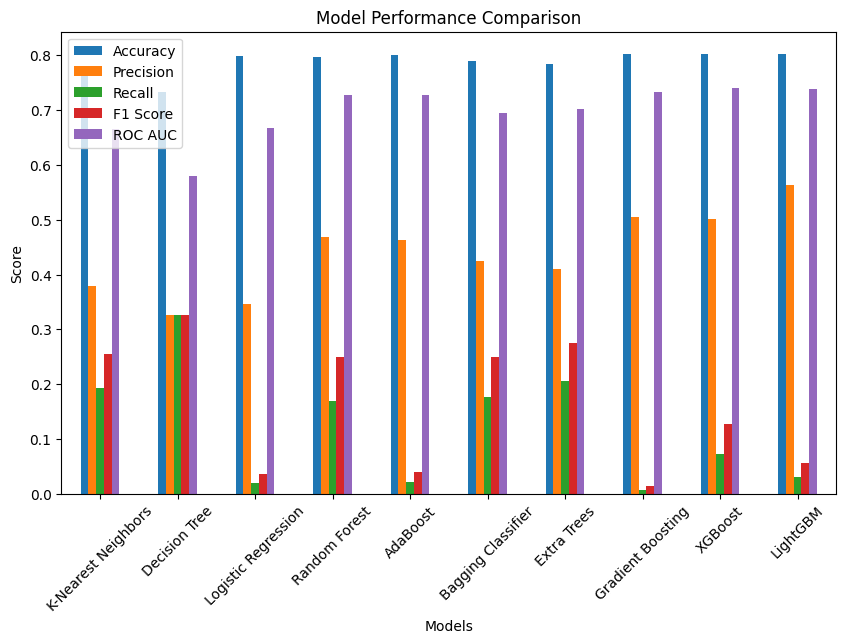

In [48]:
results_df.plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.xlabel('Models')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()